# Comparing k-means with Hierarchical Clustering
***

## Table of Contents
1. [Data Exploration](#Data-Exploration)
2. [K-means vs. Hierachical clustering](#K-means-vs.-Hierachical-Clustering)
3. [Clustering using SkLearn](#Clustering-using-SkLearn)
4. [Plotting predicted clusters](#Plotting-predicted-clusters)
5. [Comparing K-means and Hierachical clustering using the silhoutte score](#Comparing-K-means-and-Hierachical-clustering-using-the-silhoutte-score)

In [1]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import pandas as pd
import matplotlib.pyplot as plt

### Data Exploration
>Read the wine dataset into a pandas DataFrame and print a small sample  
Source: [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/machine-learning-databases/wine/)

In [2]:
wine_df = pd.read_csv("wine_data.csv")
print(wine_df.head())

   OD_read  Proline
0     3.92   1065.0
1     3.40   1050.0
2     3.17   1185.0
3     3.45   1480.0
4     2.93    735.0


>Visualize some features from the dataset by plotting the OD Reading feature against the proline feature.

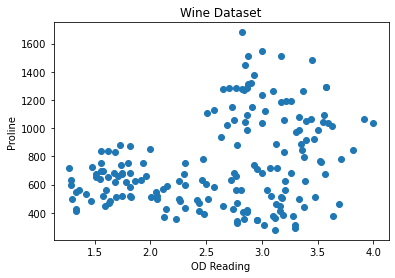

In [3]:
plt.scatter(wine_df.values[:,0], wine_df.values[:,1])
plt.title("Wine Dataset")
plt.xlabel("OD Reading")
plt.ylabel("Proline")
plt.show()

At a first glance three clusters can be observed. In regards of the hierachical clustering, given that the points are quite close to each other, with these observation is single linkage could be a good fit given that the data points.

### K-means vs. Hierachical Clustering
>List the main steps of the k-means and hierarchical clustering algorithms. What is similar between them? What is different?

<table>
<tr><th>List of steps K-Means vs. Hierachical Clustering </th><th>

| **K-means algorithm**                                                                                                                                                                                                                                                                                                                                                                                                       	| **Hierachical algorithm**                                                                                                                                                                                                                                                       	|
|:---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------	|:-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| * Pick "k" number of clusters ( = number of centroids)<br>* Place the "k" clusters at random among existing training data<br>* Calculate the distance from each point to each centroid<br>* Training points will be grouped to the nearest centroid<br>* Calculate the average position of each point in a single cluster<br>* Move centroid to mean location<br>* Repeat until convergence or maximum number of iterations is reached 	| * Given "n" data points, view each point as an individual cluster<br>* Calculate the distance between each centroid<br>* Group the closest two clusters<br>* Repeat the last two steps until there is only one cluster<br>* Plot a dendogram <br>* Decide how far down to go with the tree 	|   
    
</th></tr> </table>

<table>
<tr><th>Similarities K-Means vs. Hierachical Clustering </th><th>

| K-means algorithm and Hierarchical Algorithm 	|
|----------------------------------------------	|
| A cluster analysis method                    	|
    
</th></tr> </table>

<table>
<tr><th>Differences K-Means vs. Hierachical Clustering </th><th>

| **K-means algorithm**                                                                                                                                                       	| **Hierachical Algorithm**                                                                                                                                                                                            	|
|:-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------	|:----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------	|
| * K number of clusters predefined <br>* Faster convergence<br>* Uses the mean as a cluster centre<br>* A division of the set of data objects into-non overlapping clusters  	| * Can dynamically update the K value<br>* Begins with "n" number of clusters and sequentially<br> combines similar clusters until only one cluster is formed<br>* A set of nested clusters that are arranged in a tree 	|
    
</th></tr> </table>

### Clustering using SkLearn

>Use the sklearn implementation of k-means on the wine dataset, knowing that there are three wine types.

In [5]:
km = KMeans(3)
km_clusters = km.fit_predict(wine_df)

>Use the sklearn implementation of hierarchical clustering on the wine dataset.

In [14]:
ac = AgglomerativeClustering(3, linkage='average')
ac_clusters = ac.fit_predict(wine_df)

### Plotting predicted clusters

>Plot the predicted clusters from k-means.

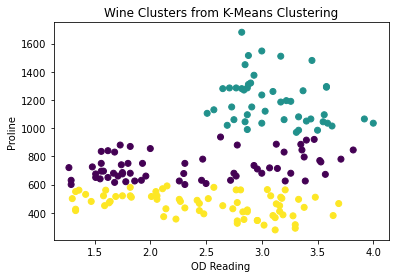

In [15]:
plt.scatter(wine_df.values[:,0], wine_df.values[:,1], c=km_clusters)
plt.title("Wine Clusters from K-Means Clustering")
plt.xlabel("OD Reading")
plt.ylabel("Proline")
plt.show()

>Plot the predicted clusters from hierarchical clustering.

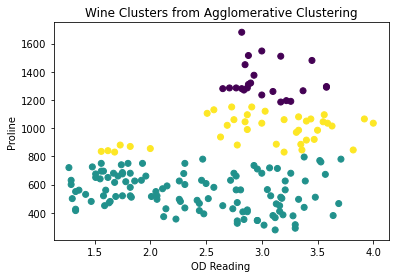

In [16]:
plt.scatter(wine_df.values[:,0], wine_df.values[:,1], c=ac_clusters)
plt.title("Wine Clusters from Agglomerative Clustering")
plt.xlabel("OD Reading")
plt.ylabel("Proline")
plt.show()

### Comparing K-means and Hierachical clustering using the silhoutte score

>Compare the silhouette score of each clustering method. Considering the scores and plots, comment on whether one model is better than the other, or whether they performed similarly.

In [17]:
# Calculate Silhouette Scores
print("Silhouette Scores for Wine Dataset:\n")
print("K-Means Clustering: ", silhouette_score(wine_df, km_clusters))
print("Agg Clustering: ", silhouette_score(wine_df, ac_clusters))

Silhouette Scores for Wine Dataset:

K-Means Clustering:  0.5809421087616886
Agg Clustering:  0.5988495817462


While there's a slight difference, both models performed quite similarly. These positive values indicate that the points are closer to the assiggned to its cluster than their neighboring clusters.

[Return to top](#Comparing-k-means-with-Hierarchical-Clustering)